In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-data/house.csv


In [2]:
# Modules, Packages and Libraries
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Exploratory data analysis

In [3]:
# Read the Dataset
df = pd.read_csv('/kaggle/input/house-data/house.csv')
df.head()

,TOTAL_VALUE,TAX,LOT_SQFT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
0,344.2,4330,9965,2436,1352,2.0,6,3,1,1,1,0
1,412.6,5190,6590,3108,1976,2.0,10,4,2,1,1,0
2,330.1,4152,7500,2294,1371,2.0,8,4,1,1,1,0
3,498.6,6272,13773,5032,2608,1.0,9,5,1,1,1,1
4,331.5,4170,5000,2370,1438,2.0,7,3,2,0,1,0


In [4]:
# Let's convert the name of the columns in smaller case
df.columns = df.columns.str.lower()
df.columns

Index(['total_value', 'tax', 'lot_sqft', 'gross_area', 'living_area', 'floors',
       'rooms', 'bedrooms', 'full_bath', 'half_bath', 'kitchen', 'fireplace'],
      dtype='object')

In [5]:
# Summary Statistics of the Data
print(df.shape) # There are 5802 observations
df.info()

# 10 Independent Variabels and 1 Dependent Varible: Total Value
# There is no non-null values as well as all the data types are either float or either int

(5802, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_value  5802 non-null   float64
 1   tax          5802 non-null   int64  
 2   lot_sqft     5802 non-null   int64  
 3   gross_area   5802 non-null   int64  
 4   living_area  5802 non-null   int64  
 5   floors       5802 non-null   float64
 6   rooms        5802 non-null   int64  
 7   bedrooms     5802 non-null   int64  
 8   full_bath    5802 non-null   int64  
 9   half_bath    5802 non-null   int64  
 10  kitchen      5802 non-null   int64  
 11  fireplace    5802 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 544.1 KB


In [6]:
df.describe()

# Graphs we have created in the Power BI

,total_value,tax,lot_sqft,gross_area,living_area,floors,rooms,bedrooms,full_bath,half_bath,kitchen,fireplace
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


# Linear regression

### Split the Dependent and Independent variables in the X and Y datasets

In [7]:
x_df = df.drop(columns=['total_value', 'tax'])
y_df = df['total_value']
print(x_df.info(), y_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lot_sqft     5802 non-null   int64  
 1   gross_area   5802 non-null   int64  
 2   living_area  5802 non-null   int64  
 3   floors       5802 non-null   float64
 4   rooms        5802 non-null   int64  
 5   bedrooms     5802 non-null   int64  
 6   full_bath    5802 non-null   int64  
 7   half_bath    5802 non-null   int64  
 8   kitchen      5802 non-null   int64  
 9   fireplace    5802 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 453.4 KB
None (5802,)


### Split the data into x-train, y-trian, x-test and y-test

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.3, random_state = 42 , shuffle= True)
print(x_train.shape, x_test.shape)

(4061, 10) (1741, 10)


In [9]:
# Liner regression model
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [10]:
#let's find out what are the coefficients and intercept
np.set_printoptions(precision=4, suppress=True)
print(model_lr.intercept_)
pd.DataFrame(x_train.columns, model_lr.coef_)

57.50926413337015


,0
0.008189,lot_sqft
0.030107,gross_area
0.054420,living_area
39.349560,floors
-0.005571,rooms
-0.438971,bedrooms
23.719695,full_bath
18.974344,half_bath
-16.887755,kitchen
20.404907,fireplace


In [11]:
# Predict the price of the test data
y_train_predict = model_lr.predict(x_train)
y_test_predict = model_lr.predict(x_test)

In [12]:
# mean absolute error
e = y_test - y_test_predict
mae = np.mean(np.abs(e))
print('mae :', mae)

#mean squared error
e = y_test - y_test_predict
mse = np.mean(e**2)
print('mse :', mse)

mae : 34.61784243642632
mse : 2108.5454620739065


In [13]:
# Lets find out the Rsqure for the model
print('Train R-Square',model_lr.score(x_train, y_train))
print('Test R-Square',model_lr.score(x_test, y_test))

Train R-Square 0.8093612001229493
Test R-Square 0.7975638139726435


### **Conclusion:** Here Model has performed same pn both the training data and test data, so there is no overfitting and underfitting.But, at the same time the accuracy of the price prediction is low.

# Polynomial Regression

In [14]:
# Create the PolynomialFeatures with degree 3 and write the Linear Regression model
pipe_poly = PolynomialFeatures(degree = 3)
pipe_lr = LinearRegression()

In [15]:
# Let's create the pipeline for the creating the polynomial model and regression model
model_poly = make_pipeline(pipe_poly, pipe_lr)
model_poly.fit(x_train, y_train)
y_test_pred = model_poly.predict(x_test)


#### Mean square error (MSE) and finding out the score for the model

In [16]:
# MSE
e = y_test - y_test_pred
mse = np.mean(e**2)
print('mse: ', mse)
print('RSquared for Train: ',model_poly.score(x_train, y_train))
print('RSquared for Test: ',model_poly.score(x_test, y_test))

mse:  10133.370520858649
RSquared for Train:  0.859269720445705
RSquared for Test:  0.027120393303253554


#### Here, we have the very high mse. If we notice the r-squared error the accuray for the train is very high - 0.8592 but for test it is vey low - 0.027. Therefore, we can conclude that there is so much overfitting is there.

#### Let's build the polynomial model with just one variable, which has the highest correlation with the house price


In [17]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', subset = 'total_value').set_precision(1)
# based on the plot we can conclude that the living area and gross area has very high corelation with the total_value. So, lets use one of them for the predict the price of houses.

,total_value,tax,lot_sqft,gross_area,living_area,floors,rooms,bedrooms,full_bath,half_bath,kitchen,fireplace
total_value,1.0,1.0,0.5,0.8,0.8,0.5,0.6,0.6,0.4,0.3,0.0,0.4
tax,1.0,1.0,0.5,0.8,0.8,0.5,0.6,0.6,0.4,0.3,0.0,0.4
lot_sqft,0.5,0.5,1.0,0.4,0.4,0.1,0.3,0.3,0.2,0.1,0.0,0.2
gross_area,0.8,0.8,0.4,1.0,0.9,0.3,0.7,0.6,0.4,0.2,0.0,0.3
living_area,0.8,0.8,0.4,0.9,1.0,0.5,0.7,0.6,0.4,0.3,0.1,0.3
floors,0.5,0.5,0.1,0.3,0.5,1.0,0.4,0.4,0.1,0.3,-0.1,0.1
rooms,0.6,0.6,0.3,0.7,0.7,0.4,1.0,0.7,0.4,0.3,0.1,0.2
bedrooms,0.6,0.6,0.3,0.6,0.6,0.4,0.7,1.0,0.3,0.3,0.1,0.2
full_bath,0.4,0.4,0.2,0.4,0.4,0.1,0.4,0.3,1.0,-0.1,0.1,0.1
half_bath,0.3,0.3,0.1,0.2,0.3,0.3,0.3,0.3,-0.1,1.0,-0.0,0.2


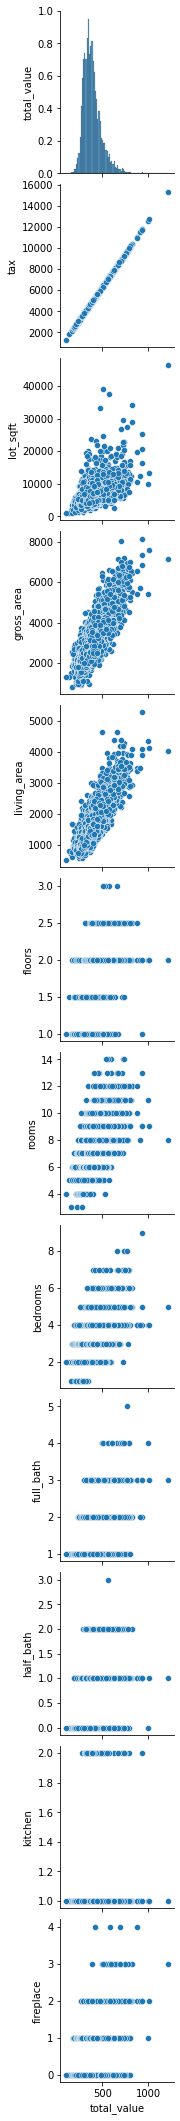

In [18]:
sns.pairplot(df, x_vars='total_value',)
# As you can see here, the pairplot shows the distribution of the various variables wrt. total_value

In [19]:
# let use the only variable as the living area
one_var_train = x_train['living_area'].to_frame()
one_var_test = x_test['living_area'].to_frame()
pipe_poly = PolynomialFeatures(degree = 3)
pipe_lr = LinearRegression()
model_poly_1 = make_pipeline(pipe_poly, pipe_lr)
model_poly_1.fit(one_var_train, y_train)
y_test_pred = model_poly_1.predict(one_var_test)
print('RSquared for Train: ',model_poly_1.score(one_var_train, y_train))
print('RSquared for Test: ',model_poly_1.score(one_var_test, y_test))

RSquared for Train:  0.7039418043366613
RSquared for Test:  0.6953457144285893


In [20]:
# let use the all the variable except the kitchen, rooms and tax 
lim_var_train = x_train[['gross_area','living_area','lot_sqft','bedrooms','floors','full_bath','half_bath','fireplace']]
lim_var_test = x_test[['gross_area','living_area','lot_sqft','bedrooms','floors','full_bath','half_bath','fireplace']]
pipe_poly = PolynomialFeatures(degree = 3)
pipe_lr = LinearRegression()
model_poly_2 = make_pipeline(pipe_poly, pipe_lr)
model_poly_2.fit(lim_var_train, y_train)
y_test_pred = model_poly_2.predict(lim_var_test)
print('RSquared for Train: ',model_poly_2.score(lim_var_train, y_train))
print('RSquared for Test: ',model_poly_2.score(lim_var_test, y_test))

RSquared for Train:  0.8482506705961026
RSquared for Test:  0.7756324673999218


#### Model 2 of polynomial regression is providing the very good accuracy, here the R-Squared is 80.53%

#### let's tune the polynomial regression model with the GridSearchCV hyperparameter method

In [21]:
degree = {'polynomialfeatures__degree' : range(1,6)}
pipe_poly = PolynomialFeatures()
pipe_lr = LinearRegression()
model_poly_2 = make_pipeline(pipe_poly, pipe_lr)
grid_search_poly = GridSearchCV(model_poly_2, param_grid=degree,cv=7)
grid_search_poly.fit(lim_var_train, y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': range(1, 6)})

In [22]:
grid_search_poly.best_estimator_.named_steps
grid_search_poly.best_params_
grid_search_poly.best_score_

0.8122035924439862

In [23]:
y_test_pred = grid_search_poly.predict(lim_var_test)
mae = np.mean(np.abs(y_test - y_test_pred))
mae
grid_search_poly.score(lim_var_test, y_test)
# So, among the degree from 1 to 7, we have the best result when the degree is 2.

0.805378600109898

# Ridge Regression

In [24]:
# Lets write the code for the Ridge Regression  - Rememebr Ridge Regression uses the L2 panelty mothod
base_ridge = Ridge(alpha = 1)
base_ridge.fit(x_train, y_train)
base_ridge.coef_, base_ridge.intercept_

(array([  0.0082,   0.0301,   0.0545,  39.2904,  -0.0041,  -0.4305,
         23.6719,  18.9538, -16.6542,  20.3932]),
 57.361695613221)

# Lets tune this model using the Grid Search CV method to find the best score possible

In [25]:
print('RSquared for Train: ',base_ridge.score(x_train, y_train))
print('RSquared for Test: ',base_ridge.score(x_test, y_test))

RSquared for Train:  0.8093609950999551
RSquared for Test:  0.7975651591119322


#### Lets tune this model using the Grid Search CV method to find the best score possible

In [26]:
# We will use the gridsearchCV for the finding the best value of alpha
ridge_params = { 'alpha'  : range(1,100,5) }
my_ridge = Ridge() 
grid_ridge_cv = GridSearchCV(my_ridge, ridge_params, cv = 7)
grid_ridge_cv.fit(x_train, y_train)


GridSearchCV(cv=7, estimator=Ridge(), param_grid={'alpha': range(1, 100, 5)})

In [27]:
# lets findout the best hyperparameters
print(grid_ridge_cv.best_estimator_)  # we have the best r-square when the alpha is 6
grid_ridge_cv.best_score_
print('R Square for the test data:',  grid_ridge_cv.score(x_test,y_test))

Ridge(alpha=6)
R Square for the test data: 0.7975661707461978


# Lasso Regression

In [28]:
#lets findout the accuracy we can get using the Lasso regression
base_lasso = Lasso(alpha = 1)
base_lasso.fit(x_train, y_train)
base_lasso.coef_, base_lasso.intercept_

(array([ 0.0082,  0.0288,  0.0631, 33.2654,  0.    ,  0.    , 16.4728,
        14.3411, -0.    , 17.8138]),
 52.76171101027779)

In [29]:
lasso_params = { 'alpha'  : [0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]  }
my_lasso = Lasso() 
grid_lasso_cv = GridSearchCV(my_lasso, lasso_params, cv = 7)
grid_lasso_cv.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10]})

In [30]:
#best alpha for Lasso
print('Best Alpha: ', grid_lasso_cv.best_estimator_)

Best Alpha:  Lasso(alpha=0.01)


In [31]:
# Predict the score when the alpha is 0.01
grid_lasso_cv.score(x_test, y_test) #again the best R Square is 0.79
#lets find the mse for the same
y_test_pred = grid_lasso_cv.predict(x_test)
e = y_test - y_test_pred
mse = np.mean(np.abs(e)**2)
mse

2108.484754498281

## Final Conclusion: After all the model, we can say that polynomial regression with the degree 2 has the best predictive power. For this model, we have received the r-square = 80.53. 